In [2]:
import scqubits as scq
scq.GUI()

Output(layout=Layout(width='100%'))

Nothing to see here.

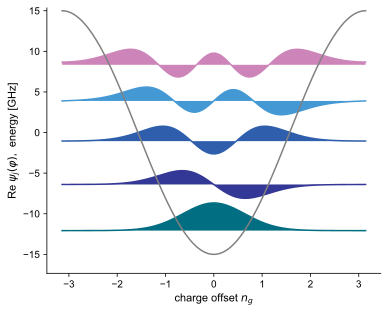

In [3]:
fig, ax = scq.GUI.fig_ax
ax.set_xlabel(r"charge offset $n_g$")
fig

In [1]:
import numpy as np
import scqubits as scq

transmon = scq.Transmon(
    EJ=1.2,
    EC=30,
    ng=0.3,
    ncut=31
)

transmon.eigenvals(evals_count=12)


array([-21.82665096,  -6.1637235 ,   8.0193175 ,  20.04763559,
        30.53712535,  38.70154385,  54.55166998,  67.49080961,
        90.05007774, 107.1126152 , 135.67738991, 156.68121682])

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

[[4702.512  -15.       0.    ...    0.       0.       0.   ]
 [ -15.    4406.832  -15.    ...    0.       0.       0.   ]
 [   0.     -15.    4120.752 ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ... 3953.712  -15.       0.   ]
 [   0.       0.       0.    ...  -15.    4234.032  -15.   ]
 [   0.       0.       0.    ...    0.     -15.    4523.952]]


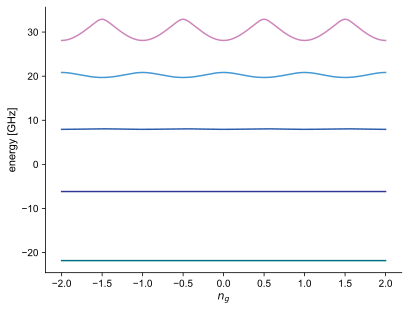

In [2]:
ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False)
print(transmon.hamiltonian())

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

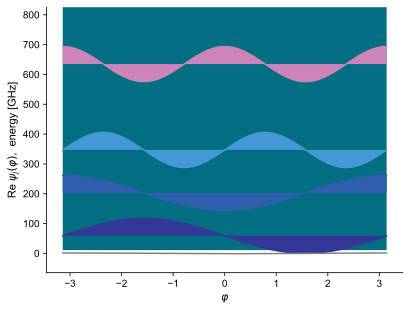

In [100]:
transmon.plot_phi_wavefunction(esys=None, which=[0,1,2,3,4], mode='real')

In [50]:
zp_yaml = """# zero-pi
branches:
- ["JJ", 1,2, EJ = 10, 20]
- ["JJ", 3,4, EJ, 20]
- ["L", 2,3, 0.008]
- ["L", 4,1, 0.008]
- ["C", 1,3, 0.02]
- ["C", 2,4, 0.02]
"""

zero_pi = scq.Circuit(zp_yaml, from_file=False)

In [53]:
# zero_pi.sym_lagrangian()
zero_pi.sym_hamiltonian()
zero_pi.hamiltonian()

<IPython.core.display.Latex object>

<9900x9900 sparse matrix of type '<class 'numpy.complex128'>'
	with 138780 stored elements in Compressed Sparse Column format>

In [90]:
print(zero_pi.var_categories)
zero_pi.cutoff_names

system_hierarchy = [[1,3], [2]]
scq.truncation_template(system_hierarchy)

zero_pi.cutoff_n_1 = 15
zero_pi.cutoff_ext_2 = 50
zero_pi.cutoff_ext_3 = 100
zero_pi.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=[150, 30])

#print(zero_pi.discretized_phi_range)
zero_pi.set_discretized_phi_range(var_indices=(2,3), phi_range=(-6*np.pi, 6*np.pi))

{'periodic': [1], 'extended': [2, 3], 'free': [], 'frozen': []}


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\theta_{3}$', ylabel='$|\\psi(\\theta_{3})|^2$'>)

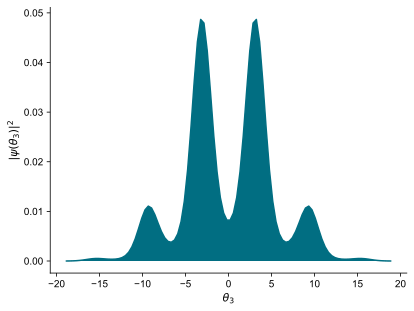

In [91]:
#zero_pi.eigenvals()
zero_pi.plot_wavefunction(which=0, var_indices=(3,))

In [92]:
print(zero_pi.supported_noise_channels())

[]
